In [42]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [43]:
year=1980
dfMovies = pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}')
dfMovies.set_index('id', inplace=True)
dfMovies


,name,birthdate
id,,
1002979,Alana Curry,1980-01-01
1865462,Alyshia Ochse,1980-01-01
2160056,Anna Trebunskaya,1980-01-01
1002633,Arnold Chon,1980-01-01
1032208,Autumn Reeser,1980-01-01
...,...,...
1829083,Tom Price,1980-01-01
3613585,Valin Brenwen,1980-01-01
1925154,Vincent Tong,1980-01-01


In [44]:
title_part="War"
dftitle = pd.read_json(f'http://localhost:8000/movies/by_title_part?t={title_part}')
dftitle.set_index('id',inplace=True)
dftitle


,title,year,duration
id,,,
4154756,Avengers: Infinity War,2018,149.0
97027,Casualties of War,1989,113.0
472062,Charlie Wilson's War,2007,102.0
6619080,Civil War Part II,1977,NaN
99385,Death Warrant,1990,89.0
824345,Howard Stern: Shut Up and Listen,1997,100.0
29034,I Cover the War!,1937,68.0
8721720,Nissin Cup Noodle: Arnold Schwarzenegger,1991,1.0
8721718,Nissin Cup Noodle: Arnold Schwarzenegger 'Nood...,1990,1.0


In [65]:
res = requests.get('http://localhost:8000/stars/stats_by_actors/')

actor_stat = res.json()
response_flatten = [ { **cell['name'],"nombre_de_film": cell['nombre_de_film'],"premier film": cell["premier_film"], "dernier film": cell['dernier_film']} for cell in actor_stat]

dfactors = pd.DataFrame(response_flatten)
dfactors.set_index('id')



,name,birthdate,nombre_de_film,premier film,dernier film
id,,,,,
78,John Wayne,1907-05-26,172,1926,1976
1230,Harrison Ford,1884-03-16,86,1915,1932
125,Sean Connery,1930-08-25,73,1954,2012
230,Sylvester Stallone,1946-07-06,73,1969,2019
158,Tom Hanks,1956-07-09,69,1980,2020
...,...,...,...,...,...
5235601,Jeff Glover,None,5,2013,2017
7383710,Jay D. Kacho,None,5,2016,2019
7586734,Douglas Bunn,None,5,2000,2010


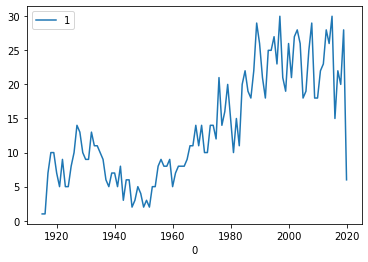

In [46]:
dfStatsMovieByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMovieByYear.set_index(0, inplace=True)
dfStatsMovieByYear.plot()

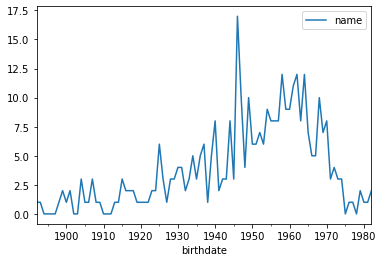

In [90]:
limit = 500
dfstars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfstars.set_index('id', inplace=True)
dfstars

dfactor_by_year= dfactor_by_year.groupby(pd.Grouper(key='birthdate', freq='Y')).count()
dfactor_by_year.plot()

In [73]:
res = requests.get('http://localhost:8000/stars/stats_by_actors/')

actor_stat = res.json()
response_flatten = [ { **cell['name'],"nombre_de_film": cell['nombre_de_film'],"premier_film": cell["premier_film"], "dernier_film": cell['dernier_film']} for cell in actor_stat]

dfactors = pd.DataFrame(response_flatten)
dft10actors = dfactors[:10]
dft10actors

,name,birthdate,id,nombre_de_film,premier_film,dernier_film
0,John Wayne,1907-05-26,78,172,1926,1976
1,Harrison Ford,1884-03-16,1230,86,1915,1932
2,Sean Connery,1930-08-25,125,73,1954,2012
3,Sylvester Stallone,1946-07-06,230,73,1969,2019
4,Tom Hanks,1956-07-09,158,69,1980,2020
5,Jean-Claude Van Damme,1960-10-18,241,66,1979,2019
6,Clint Eastwood,1930-05-31,142,63,1955,2018
7,Harrison Ford,1942-07-13,148,63,1966,2020
8,Arnold Schwarzenegger,1947-07-30,216,56,1970,2019
9,Will Smith,1968-09-25,226,50,1988,2020


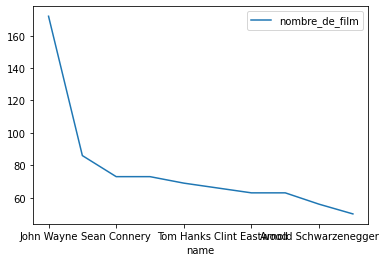

In [74]:
top10nombredeFilm = dft10actors[["name", "nombre_de_film"]].set_index("name")
top10nombredeFilm.plot()


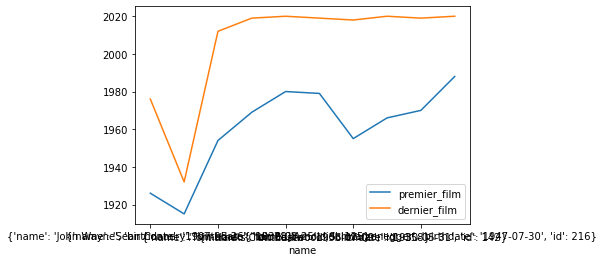

In [75]:
top10film= dft10actors[['name', 'premier_film', 'dernier_film']].set_index('name')
top10Film.plot()